# Running Time Analysis

Use numpy and pandas for this lab. Download the csv file "matrix_multiply_times.csv" and put it in this folder

In [1]:
!wget https://aet-cs.github.io/white/ML/lessons/matrix_multiply_times.csv

--2024-09-23 14:59:16--  https://aet-cs.github.io/white/ML/lessons/matrix_multiply_times.csv
Resolving aet-cs.github.io (aet-cs.github.io)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to aet-cs.github.io (aet-cs.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 897 [text/csv]
Saving to: ‘matrix_multiply_times.csv’

matrix_multiply_tim 100%[===================>]     897  --.-KB/s    in 0s      

2024-09-23 14:59:16 (95.6 MB/s) - ‘matrix_multiply_times.csv’ saved [897/897]



Read the csv as a DataFrame and display it (`pd.read_csv` will help)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/matrix_multiply_times.csv")
df

,exp,Matrix row size,Strassen Time,Multiply Time,numpy Time,cpp times
0,2,4,0.000138,0.000042,0.000010,0.000016
1,3,8,0.000655,0.000312,0.000022,0.000017
2,4,16,0.003158,0.001751,0.000007,0.000025
3,5,32,0.027272,0.015435,0.000041,0.000061
4,6,64,0.173862,0.112081,0.000281,0.000340
5,7,128,1.222298,0.816329,0.001731,0.001901
6,8,256,9.340878,6.623963,0.019976,0.013065
7,9,512,77.638901,55.539424,0.175177,0.095094
8,10,1024,436.458083,506.821904,2.175456,1.057194
9,11,2048,NaN,NaN,75.134066,13.453321


Drop the column "Matrix row size" and save it as a *new* dataframe (I like to use the names df,df2,df3,etc as I do this kind of work) (read about `df.drop`)

In [4]:
df2 = df.drop(columns=["Matrix row size"])
df2

,exp,Strassen Time,Multiply Time,numpy Time,cpp times
0,2,0.000138,0.000042,0.000010,0.000016
1,3,0.000655,0.000312,0.000022,0.000017
2,4,0.003158,0.001751,0.000007,0.000025
3,5,0.027272,0.015435,0.000041,0.000061
4,6,0.173862,0.112081,0.000281,0.000340
5,7,1.222298,0.816329,0.001731,0.001901
6,8,9.340878,6.623963,0.019976,0.013065
7,9,77.638901,55.539424,0.175177,0.095094
8,10,436.458083,506.821904,2.175456,1.057194
9,11,NaN,NaN,75.134066,13.453321


Plot the data frame data, `x` is the 'exp' column, the `y` values are the other columns (times in seconds). Use pandas e.g.
```python
df2.plot(...)
```

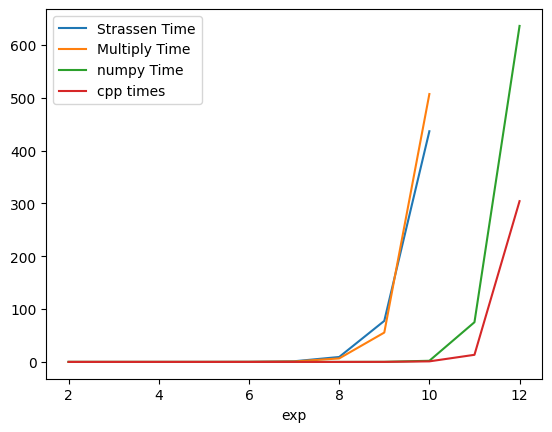

In [5]:
df2.plot(x="exp", y=["Strassen Time", "Multiply Time", "numpy Time", "cpp times"]);

Add new columns that represent the log transformations of the existing time columns, because we want a log-log analysis eventually. Here's an example
```python
df2['strass_log'] = np.log(df['Strassen Time']) ## PLEASE use tab-completion for this!
```
Then *drop* the old (non-log) columns. Store the result in a *new* data frame that has only 5 columns (one 'exp' and four log-times)

In [6]:
df2['strass_log'] = np.log(df['Strassen Time'])
df2['mult_log'] = np.log(df['Multiply Time'])
df2['numpy_log'] = np.log(df['numpy Time'])
df2['cpp_log'] = np.log(df['cpp times'])
df2

,exp,Strassen Time,Multiply Time,numpy Time,cpp times,strass_log,mult_log,numpy_log,cpp_log
0,2,0.000138,0.000042,0.000010,0.000016,-8.891552,-10.082389,-11.509302,-11.040494
1,3,0.000655,0.000312,0.000022,0.000017,-7.330355,-8.072213,-10.723776,-10.960029
2,4,0.003158,0.001751,0.000007,0.000025,-5.757700,-6.347397,-11.848063,-10.592706
3,5,0.027272,0.015435,0.000041,0.000061,-3.601894,-4.171087,-10.089983,-9.697773
4,6,0.173862,0.112081,0.000281,0.000340,-1.749492,-2.188531,-8.176565,-7.986275
5,7,1.222298,0.816329,0.001731,0.001901,0.200733,-0.202938,-6.359166,-6.265571
6,8,9.340878,6.623963,0.019976,0.013065,2.234400,1.890694,-3.913216,-4.337811
7,9,77.638901,55.539424,0.175177,0.095094,4.352069,4.017093,-1.741956,-2.352892
8,10,436.458083,506.821904,2.175456,1.057194,6.078692,6.228160,0.777238,0.055618
9,11,NaN,NaN,75.134066,13.453321,NaN,NaN,4.319274,2.599226


In [7]:
df3 = df2.drop(columns=['Strassen Time', 'Multiply Time', 'numpy Time', 'cpp times'])
df3

,exp,strass_log,mult_log,numpy_log,cpp_log
0,2,-8.891552,-10.082389,-11.509302,-11.040494
1,3,-7.330355,-8.072213,-10.723776,-10.960029
2,4,-5.757700,-6.347397,-11.848063,-10.592706
3,5,-3.601894,-4.171087,-10.089983,-9.697773
4,6,-1.749492,-2.188531,-8.176565,-7.986275
5,7,0.200733,-0.202938,-6.359166,-6.265571
6,8,2.234400,1.890694,-3.913216,-4.337811
7,9,4.352069,4.017093,-1.741956,-2.352892
8,10,6.078692,6.228160,0.777238,0.055618
9,11,NaN,NaN,4.319274,2.599226


Plot the new dataframe line plots: x vs. log-times

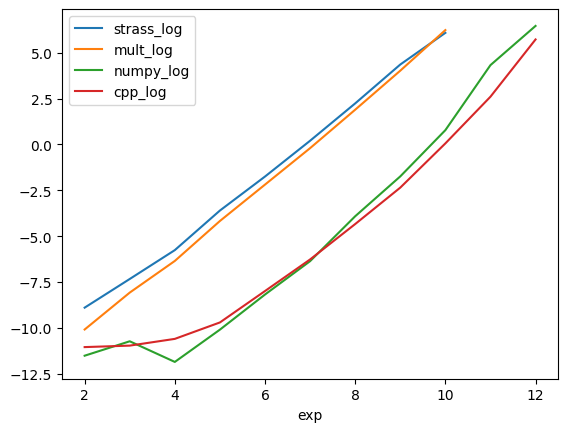

In [8]:
df3.plot(x='exp', y=['strass_log', 'mult_log', 'numpy_log', 'cpp_log']);

Now we want to do a log-log regression. You will need numpy. Luckily pandas and numpy play nicely together. For example you could say
```python
df = #some dataframe
x = df['x']
y = df['y']
coeffs = np.polyfit(x,y,1)
```
And you can even add in things like
```python
y = np.log(y)
x = 2**x
x = x**2
y = y + np.sqrt(y)
```
for example

Do the log-log regressions and print out a table in this format
```
   algorithm name, rate of growth (degree), corrcoeff
```
Recall you can get corrcoeff from
```python
np.corrcoeff(x,y)[0,1]
```


In [9]:
names = ['Strassen', 'Multiply', 'Numpy', 'Cpp']
algs = ['strass', 'mult', 'numpy', 'cpp']
degrees = []
coefs = []
df3['row_log'] = np.log(2 ** df3['exp'])

for name in algs:
    dftemp = df3[df3[f'{name}_log'].notnull()]
    k, c = np.polyfit(dftemp['row_log'], dftemp[f'{name}_log'], 1)
    degrees.append(str(float('%.4g' % k)))
    coefs.append(str(float('%.5g' % np.corrcoef(dftemp['row_log'], dftemp[f'{name}_log'])[0, 1])))

tabletext = np.array([names, degrees, coefs]).T

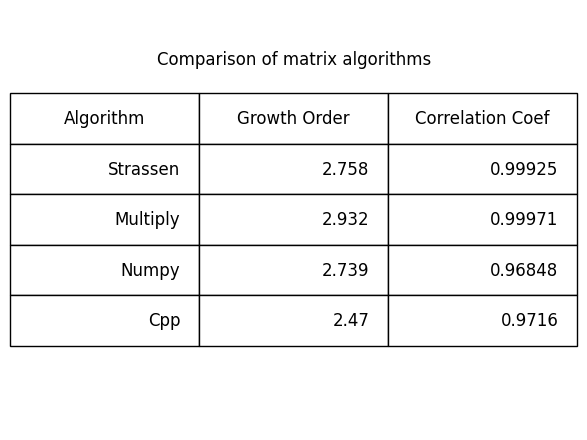

In [10]:
fig, ax = plt.subplots()
fig.tight_layout()
ax.axis('off')
ax.set_title("Comparison of matrix algorithms", y=0.85)

table = ax.table(tabletext, colLabels=['Algorithm', 'Growth Order', 'Correlation Coef'], loc='center', bbox=[0, .2, 1, 0.6])
table.auto_set_font_size(False)
table.set_fontsize(12)
plt.show()

You should notice some problems in your results, and the problems will depend on what you did above. What did you expect and how does it compare to what you got? Now your 
job is to fix it. Here are some things to consider
*  Some regression may not even work because it doesn't like the data
*  Are the units of your "x" column in the regression correct? (They should be log of the row length)
*  What base are you using with the logs and are you consistent?
*  Small values of $n$ might be skewing the data. Filter them out (see below)
*  Rows with NA value are also problematic. Drop them judiciously
*  Make sure you understand how to interpret the regression equations and numpy results

Work through the Pandas filtering tricks section and then do your analysis afterwards.

## Pandas filtering tricks

In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.DataFrame({'x': [1,2,3,10,20,-10,np.nan], 'y':[5,4,3,4,1,0,9]})
df['log_y'] = np.log2(df['y']);

/home/arush/.asdf/installs/python/3.11.9/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
df

,x,y,log_y
0,1.0,5,2.321928
1,2.0,4,2.000000
2,3.0,3,1.584963
3,10.0,4,2.000000
4,20.0,1,0.000000
5,-10.0,0,-inf
6,NaN,9,3.169925


You can index columns by boolean comparisons

In [14]:
df[df.x>5]

,x,y,log_y
3,10.0,4,2.0
4,20.0,1,0.0


This just returns a list of T/F values

In [15]:
df.x>5

0    False
1    False
2    False
3     True
4     True
5    False
6    False
Name: x, dtype: bool

Here's a different syntax

In [16]:
df['x']<5

0     True
1     True
2     True
3    False
4    False
5     True
6    False
Name: x, dtype: bool

In [17]:
df['log_y']==-np.inf

0    False
1    False
2    False
3    False
4    False
5     True
6    False
Name: log_y, dtype: bool

Boolean 'not' is `~` in pandas

In [18]:
df[~(df['log_y']==-np.inf)]

,x,y,log_y
0,1.0,5,2.321928
1,2.0,4,2.000000
2,3.0,3,1.584963
3,10.0,4,2.000000
4,20.0,1,0.000000
6,NaN,9,3.169925


In [19]:
df[~df['x'].isna()]

,x,y,log_y
0,1.0,5,2.321928
1,2.0,4,2.000000
2,3.0,3,1.584963
3,10.0,4,2.000000
4,20.0,1,0.000000
5,-10.0,0,-inf


## Analysis

Complete your final analysis here of the 4 running times by using techniques you have learned in this notebook. Print out your final table the the running time comparisons, based on your best justifiable arguments

    exp  strass_log  mult_log  numpy_log   cpp_log   row_log
4     6   -1.749492 -2.188531  -8.176565 -7.986275  4.158883
5     7    0.200733 -0.202938  -6.359166 -6.265571  4.852030
6     8    2.234400  1.890694  -3.913216 -4.337811  5.545177
7     9    4.352069  4.017093  -1.741956 -2.352892  6.238325
8    10    6.078692  6.228160   0.777238  0.055618  6.931472
9    11         NaN       NaN   4.319274  2.599226  7.624619
10   12         NaN       NaN   6.454735  5.717712  8.317766


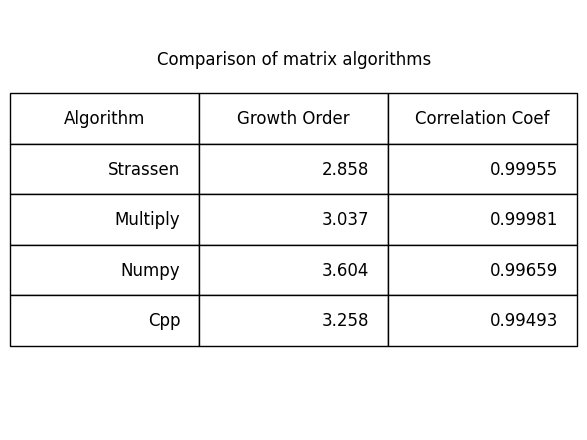

In [20]:
names = ['Strassen', 'Multiply', 'Numpy', 'Cpp']
algs = ['strass', 'mult', 'numpy', 'cpp']
degrees = []
coefs = []
df3['row_log'] = np.log(2 ** df3['exp'])

df4 = df3.tail(7)
print(df4)
for name in algs:
    dftemp = df4[df4[f'{name}_log'].notnull()]
    k, c = np.polyfit(dftemp['row_log'], dftemp[f'{name}_log'], 1)
    degrees.append(str(float('%.4g' % k)))
    coefs.append(str(float('%.5g' % np.corrcoef(dftemp['row_log'], dftemp[f'{name}_log'])[0, 1])))

tabletext = np.array([names, degrees, coefs]).T

fig, ax = plt.subplots()
fig.tight_layout()
ax.axis('off')
ax.set_title("Comparison of matrix algorithms", y=0.85)

table = ax.table(tabletext, colLabels=['Algorithm', 'Growth Order', 'Correlation Coef'], loc='center', bbox=[0, .2, 1, 0.6])
table.auto_set_font_size(False)
table.set_fontsize(12)
plt.show()